In [6]:
import numpy as np
import pandas as pd
from src.utils.path_getter import PathGetter
from catboost import CatBoostClassifier, CatBoostRegressor
import shap
shap.initjs()


In [12]:
results_df = pd.read_parquet(PathGetter.get_data_directory()/'experiments2.parquet')

In [16]:
results_df = results_df.fillna('NA')
feature_columns = [col for col in results_df.columns if not col.endswith('f1')]
result_column = 'dev_f1'
X = results_df[feature_columns].astype('str')
y = results_df[result_column]

In [17]:
X

,pretokenizer,remove_citations,remove_duplicates,tokenizer,replace_numbers,remove_stopwords,lemmatize,post_tokenizer,vectorizer,ngram_range,binary,model,model_name,num_gram,vocab_size
0,SimplePreprocessor,True,True,SpacyTokenizer,True,True,True,NullPostTokenizer,SkTfidfVectorizer,[1 1],True,AbstractModel,LR,NA,NA
1,SimplePreprocessor,True,True,SpacyTokenizer,True,True,True,NullPostTokenizer,SkTfidfVectorizer,[1 1],False,AbstractModel,LR,NA,NA
2,SimplePreprocessor,True,True,SpacyTokenizer,True,True,True,NullPostTokenizer,SkTfidfVectorizer,[1 2],True,AbstractModel,LR,NA,NA
3,SimplePreprocessor,True,True,SpacyTokenizer,True,True,True,NullPostTokenizer,SkTfidfVectorizer,[1 2],False,AbstractModel,LR,NA,NA
4,SimplePreprocessor,True,True,SpacyTokenizer,True,True,True,NullPostTokenizer,SkCountVectorizer,[1 1],True,AbstractModel,LR,NA,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,SimplePreprocessor,False,False,SentencePieceTokenizer,NA,NA,NA,PhraserMerger,SkCountVectorizer,[1 1],False,AbstractModel,LR,2.0,10000.0
1316,SimplePreprocessor,False,False,SentencePieceTokenizer,NA,NA,NA,PhraserMerger,SkCountVectorizer,[1 2],True,AbstractModel,LR,2.0,10000.0
1317,SimplePreprocessor,False,False,SentencePieceTokenizer,NA,NA,NA,PhraserMerger,SkCountVectorizer,[1 2],False,AbstractModel,LR,2.0,10000.0
1318,SimplePreprocessor,False,False,SentencePieceTokenizer,NA,NA,NA,PhraserMerger,W2vVectorizer,NA,NA,AbstractModel,LR,2.0,10000.0


In [18]:
model = CatBoostRegressor(iterations=300, learning_rate=0.1, random_seed=123, cat_features=feature_columns)
model.fit(X, y, verbose=False, plot=False)

In [21]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y, model.predict(X))
mse

8.29915018369445e-05

In [31]:
explainer = shap.TreeExplainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.force(shap_values[0, ...])

In [30]:
shap.plots.force(shap_values[:, ...])

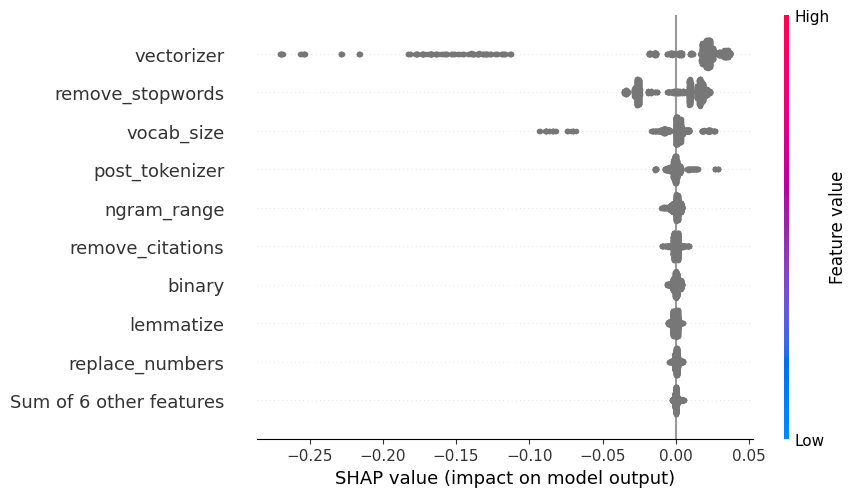

In [23]:
shap.plots.beeswarm(shap_values)

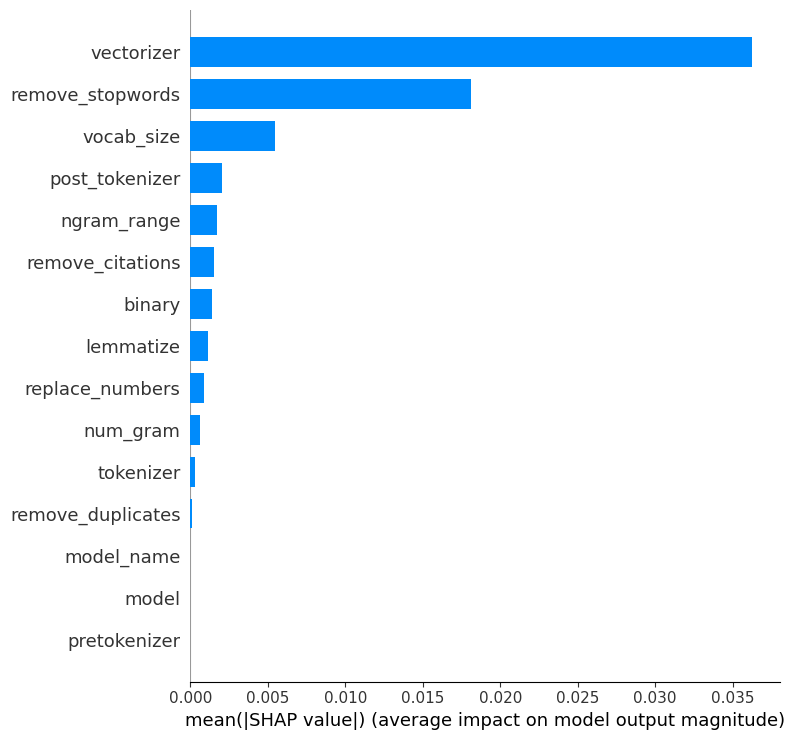

In [24]:
shap.summary_plot(shap_values, X, plot_type="bar")

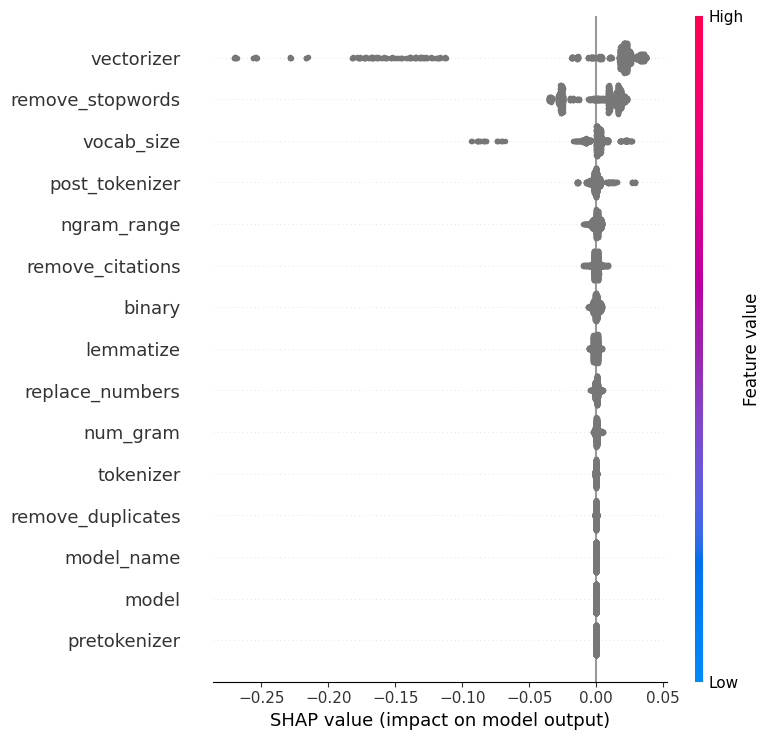

In [25]:
shap.summary_plot(shap_values, X)

In [28]:
shap.force_plot(explainer.expected_value, shap_values[0:50], X.iloc[0:50])

ValueError: visualize() can only display Explanation objects (or arrays of them)!